# Road Accident Data Analysis & Model Training
This notebook performs EDA, preprocessing, model training, and evaluation on the uploaded road accident dataset.

In [59]:
 pip install ipykernel -U --user --force-reinstall

Note: you may need to restart the kernel to use updated packages.Collecting ipykernel
  Using cached ipykernel-6.30.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached comm-0.2.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached debugpy-1.8.16-cp310-cp310-win_amd64.whl.metadata (1.4 kB)
  Using cached ipython-8.37.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_core-5.8.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
  Using cached nest_asyncio-1.6.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached psutil-7.0.0-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached pyzmq-27.0.1-cp310-cp310-win_amd64.whl.metadata (6.0 kB)
  Using cached tornado-6.5.2-cp39-abi3-win_amd64.whl.metadata (2.9 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached colora

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [60]:
pip install --upgrade --force-reinstall pandas



  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

  Attempting uninstall: pytz

    Found existing installation: pytz 2025.2

   ---------------------------------------- 0/6 [pytz]
    Uninstalling pytz-2025.2:
   ---------------------------------------- 0/6 [pytz]
  

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [61]:
pip install seaborn matplotlib scikit-learn


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [63]:
df = pd.read_csv(r'C:\Users\Nidurangani\OneDrive\Desktop\Assignment streamlit\data\road_accident.csv')
df.head()

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,63,15,231,59,573,158,1099
1,Anuradhapura,102,21,311,84,575,200,1293
2,Badulla (Badulla & Bandarawela Divisions),35,12,149,51,367,211,825
3,Batticaloa,45,9,183,30,507,95,869
4,Chilaw (Chilaw & Puttalam Divisions),140,19,267,69,420,98,1013


In [64]:

# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    26 non-null     object
 1   No.of Deaths Male           26 non-null     int64 
 2   No.of Deaths Female         26 non-null     int64 
 3   Grievous Injury Male        26 non-null     int64 
 4   Grievous Injury Female      26 non-null     int64 
 5   Non Grievous Injury Male    26 non-null     int64 
 6   Non Grievous Injury Female  26 non-null     int64 
 7   Total                       26 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.8+ KB
None
       No.of Deaths Male  No.of Deaths Female  Grievous Injury Male  \
count          26.000000            26.000000             26.000000   
mean          167.846154            38.076923            545.076923   
std           417.586848            94.821906           1358.308534   

In [65]:
# Summary statistics
df.describe(include='all')


,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
count,26,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ampara,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,167.846154,38.076923,545.076923,141.307692,1191.230769,386.538462,2470.076923
std,NaN,417.586848,94.821906,1358.308534,353.195557,2962.525940,961.517311,6143.991354
min,NaN,2.000000,1.000000,7.000000,2.000000,11.000000,4.000000,27.000000
25%,NaN,37.500000,8.250000,115.250000,24.000000,344.250000,92.000000,664.000000
50%,NaN,65.000000,14.500000,233.000000,60.500000,479.000000,154.500000,984.000000
75%,NaN,126.500000,29.500000,331.000000,95.750000,831.500000,306.500000,1738.250000


In [66]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Location                      0
No.of Deaths Male             0
No.of Deaths Female           0
Grievous Injury Male          0
Grievous Injury Female        0
Non Grievous Injury Male      0
Non Grievous Injury Female    0
Total                         0
dtype: int64


In [67]:
# Handle missing values (example: fill numeric with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

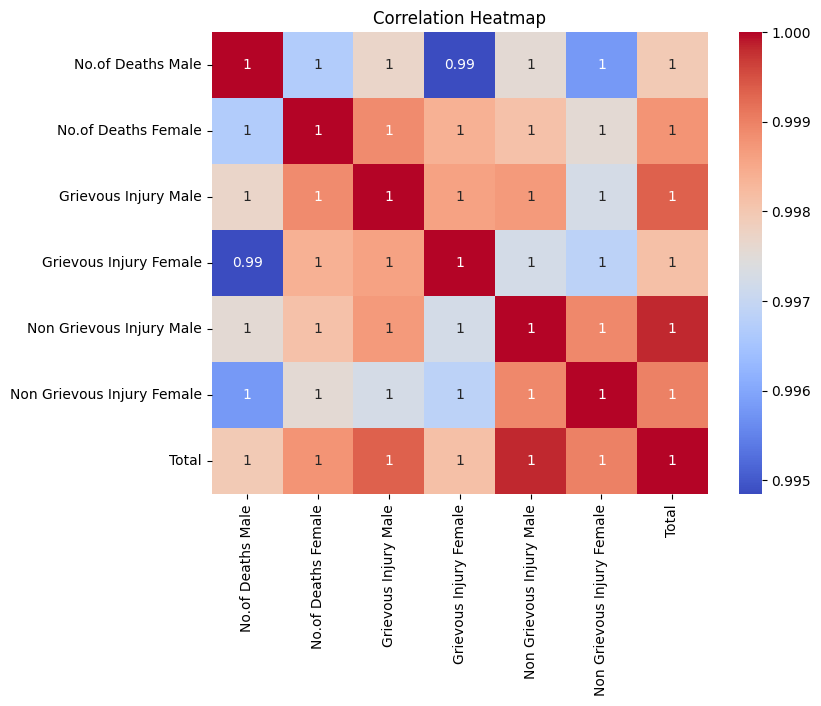

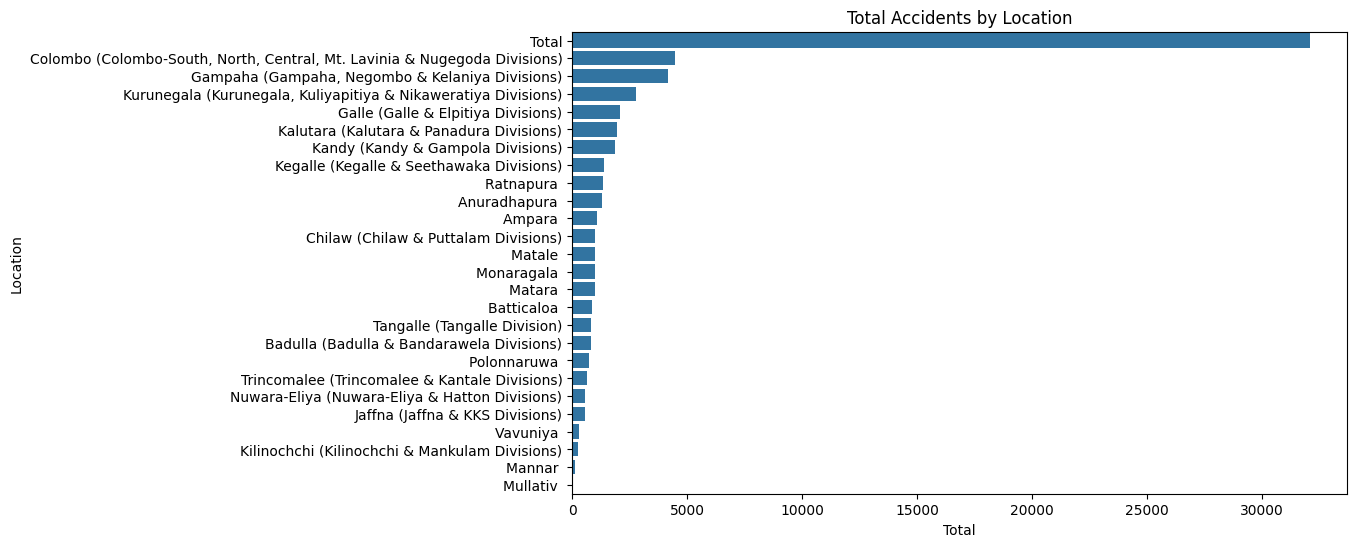

In [68]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Total accidents by location
plt.figure(figsize=(10,6))
sns.barplot(x="Total", y="Location", data=df.sort_values("Total", ascending=False))
plt.title("Total Accidents by Location")
plt.show()


In [69]:
# Encode Location
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

# Define target: deaths > median
target = (df['No.of Deaths Male'] + df['No.of Deaths Female'] > 
          (df['No.of Deaths Male'] + df['No.of Deaths Female']).median()).astype(int)

X = df.drop(columns=['Total'])
y = target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


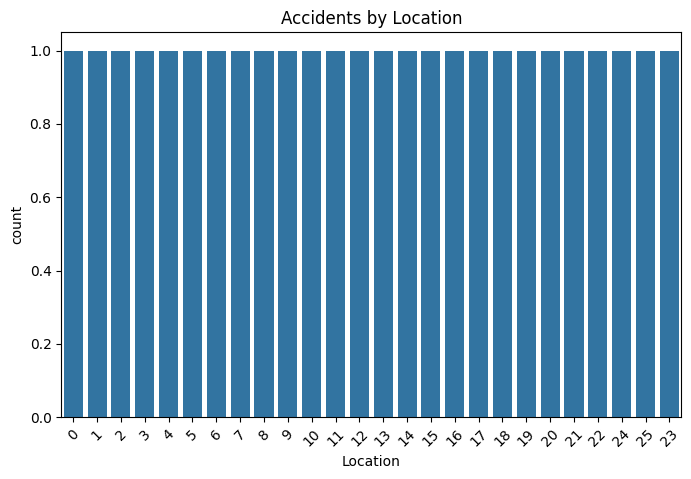

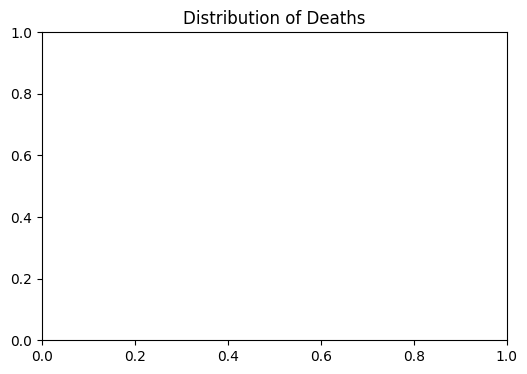

In [70]:
# Visualization examples
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Location", order=df["Location"].value_counts().index)
plt.title("Accidents by Location")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(6,4))

plt.title("Distribution of Deaths")
plt.show()

In [71]:
df = pd.read_csv(r'C:\Users\Nidurangani\OneDrive\Desktop\Assignment streamlit\data\road_accident.csv')
df.head()

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,63,15,231,59,573,158,1099
1,Anuradhapura,102,21,311,84,575,200,1293
2,Badulla (Badulla & Bandarawela Divisions),35,12,149,51,367,211,825
3,Batticaloa,45,9,183,30,507,95,869
4,Chilaw (Chilaw & Puttalam Divisions),140,19,267,69,420,98,1013


In [72]:
df = pd.read_csv(r'C:\Users\Nidurangani\OneDrive\Desktop\Assignment streamlit\data\road_accident.csv')
df.head()

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,63,15,231,59,573,158,1099
1,Anuradhapura,102,21,311,84,575,200,1293
2,Badulla (Badulla & Bandarawela Divisions),35,12,149,51,367,211,825
3,Batticaloa,45,9,183,30,507,95,869
4,Chilaw (Chilaw & Puttalam Divisions),140,19,267,69,420,98,1013


In [73]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Ampara '

<Figure size 800x600 with 0 Axes>

In [ ]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:

# # 1️⃣ Prepare data
X = df.drop(columns=['Location', 'Total'])  # Features
y = df['Total']   


In [ ]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Scale features (SVM benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Logistic Regression (since target is continuous, we use LinearRegression)
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# SVM (Support Vector Regressor)
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
preds = rf.predict(X_test)  # Random Forest example
print("R2 Score on Test:", r2_score(y_test, preds))


R2 Score on Test: 0.9823607360680697


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 mean:", scores.mean())


Cross-validation R2 mean: 0.6212639222630727


In [ ]:
# 3️⃣ Evaluate models
models = {'Random Forest': rf, 'Linear Regression': lr, 'SVM': svm}

for name, model in models.items():
    if name == 'SVM':
        preds = model.predict(X_test_scaled)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        preds = model.predict(X_test)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    print(f"Model: {name}")
    print("R2 Score on Test:", r2_score(y_test, preds))
    print("Cross-validation R2 mean:", scores.mean())
    print("-"*40)

Model: Random Forest
R2 Score on Test: 0.9823607360680697
Cross-validation R2 mean: 0.6212639222630727
----------------------------------------
Model: Linear Regression
R2 Score on Test: 1.0
Cross-validation R2 mean: 1.0
----------------------------------------
Model: SVM
R2 Score on Test: 0.7786300453514681
Cross-validation R2 mean: 0.3033510056275267
----------------------------------------


In [ ]:
# 4️⃣ Select best model (example: Random Forest) and save
best_model = rf
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the scaler for SVM if needed later
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model training and saving complete!")

✅ Model training and saving complete!
